# Importing Required Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['bitcointweets.csv']


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Loading Data

In [3]:
# Load Data
df = pd.read_csv('../input/bitcointweets.csv', header = None)
pd.set_option('display.max_colwidth', -1)
df.head()

,0,1,2,3,4,5,6,7
0,Fri Mar 23 00:40:32 +0000 2018,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",myresumerocket,16522,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['neutral']
1,Fri Mar 23 00:40:34 +0000 2018,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,BitMocro,1295,0,[u'Bitcoin'],"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",['neutral']
2,Fri Mar 23 00:40:35 +0000 2018,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,hojachotopur,6090,0,"[u'blockchain', u'Tipper', u'TipperEconomy']","<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['positive']
3,Fri Mar 23 00:40:36 +0000 2018,free coins https://t.co/DiuoePJdap,denies_distro,2626,0,[],"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",['positive']
4,Fri Mar 23 00:40:36 +0000 2018,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,aditzgraha,184,0,[],"<a href=""http://twitter.com/download/android"" rel=""nofollow"">Twitter for Android</a>",['positive']


In [4]:
df = df[[1,7]]
df.columns = ['tweet','label']
df.head()

,tweet,label
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral']
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral']
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive']
3,free coins https://t.co/DiuoePJdap,['positive']
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive']


In [5]:
df.tail()

,tweet,label
50854,RT @fixy_app: Fixy Network brings popular cryptocurrencies and retailers as partners with benefits from blockchain. Partner Stores will acc…,['positive']
50855,"RT @bethereumteam: After a successful launch of our Bounty campaign, we've managed to filter out the Bounty related questions to: https://t…",['positive']
50856,"RT @GymRewards: Buy #GYMRewards Tokens, Bonus Time is ending! https://t.co/HDvhoZrz2J, #ICO #cryptocurrency #mobile #app #mining #exercisin…",['neutral']
50857,I added a video to a @YouTube playlist https://t.co/ntFJrNvSvZ How To Bitcoin Cloud Mining Free For Lifetime Urdu / Hindi,['positive']
50858,RT @Raybambs: Airdrop PhotoCoin Airdrop Round#2. 100 #PhotoCoin will be giving to everyone who complete the google form. Your account will…,['positive']


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50859 entries, 0 to 50858
Data columns (total 2 columns):
tweet    50859 non-null object
label    50859 non-null object
dtypes: object(2)
memory usage: 794.8+ KB


In [7]:
df.shape

(50859, 2)

In [8]:
df.describe()

,tweet,label
count,50859,50859
unique,28136,3
top,RT @GymRewards: https://t.co/Bm9sIxiiwU Checkout our #bitcointalk #ANN https://t.co/J5xnJJr7Sa … #Gymrewards #tokenssale #ethereum #bitcoi…,['positive']
freq,672,22937


# Exploratory Data Analysis

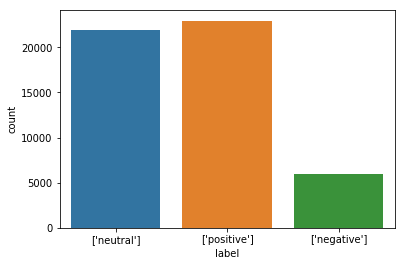

In [9]:
sns.countplot(df["label"])

In [10]:
df["text_length"] = df["tweet"].apply(len)

In [11]:
df[["label","text_length","tweet"]].head()

,label,text_length,tweet
0,['neutral'],140,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…"
1,['neutral'],137,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy
2,['positive'],140,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…
3,['positive'],34,free coins https://t.co/DiuoePJdap
4,['positive'],146,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…


In [12]:
df["text_length"].describe()

count    50859.000000
mean     127.650072  
std      23.595770   
min      7.000000    
25%      126.000000  
50%      140.000000  
75%      140.000000  
max      166.000000  
Name: text_length, dtype: float64

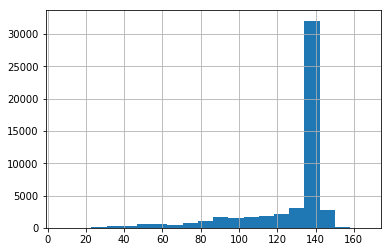

In [13]:
df["text_length"].hist(bins=20)

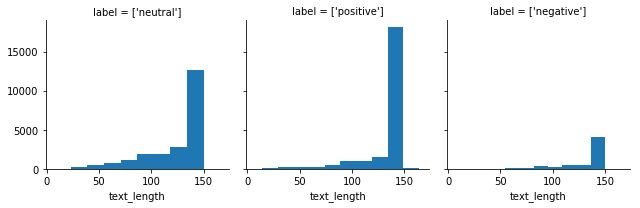

In [14]:
g = sns.FacetGrid(df,col = "label")
g.map(plt.hist,"text_length")

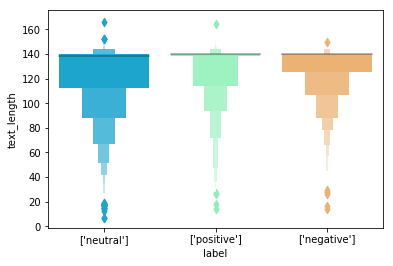

In [15]:
sns.boxenplot(x="label",y="text_length",data=df, palette="rainbow")

In [16]:
#word cloud
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [17]:
import re

def clean_text(s):
    s = re.sub(r'http\S+', '', s)
    s = re.sub('(RT|via)((?:\\b\\W*@\\w+)+)', ' ', s)
    s = re.sub(r'@\S+', '', s)
    s = re.sub('&amp', ' ', s)
    return s

df['clean_tweet'] = df['tweet'].apply(clean_text)

In [18]:
df.head()

,tweet,label,text_length,clean_tweet
0,"RT @ALXTOKEN: Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…",['neutral'],140,": Paul Krugman, Nobel Luddite. I had to tweak the nose of this Bitcoin enemy. He says such foolish things. Here's the link: htt…"
1,@lopp @_Kevin_Pham @psycho_sage @naval But @ProfFaustus (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂 https://t.co/SBAMFQ2Yiy,['neutral'],137,But (dum b a ss) said you know nothing about #Bitcoin ... 😂😂😂
2,RT @tippereconomy: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…,['positive'],140,: Another use case for #blockchain and #Tipper. The #TipperEconomy can unseat Facebook and change everything! ICO Live No…
3,free coins https://t.co/DiuoePJdap,['positive'],34,free coins
4,RT @payvxofficial: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; https://t.co/dhprzsSxek\nCurrencies accept…,['positive'],146,: WE are happy to announce that PayVX Presale Phase 1 is now LIVE!\n\nSign up --&gt;&gt; \nCurrencies accept…


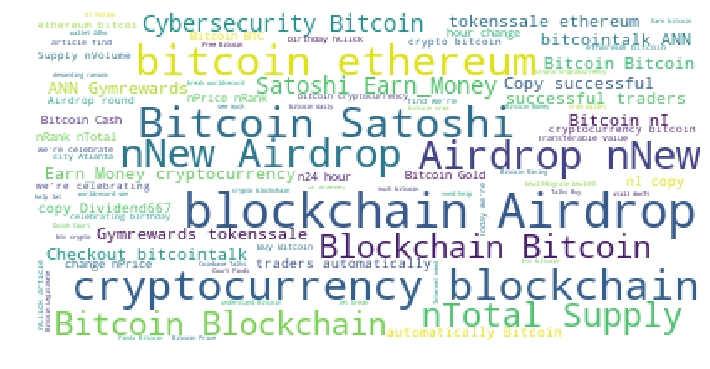

In [19]:
text = df["clean_tweet"].to_string()
wordcloud = WordCloud(relative_scaling=0.5 , background_color='white',stopwords=set(stopwords.words('english'))).generate(text)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Encode Categorical Variable

In [20]:
X = df["clean_tweet"]
y = pd.get_dummies(df["label"].values)
y.head()

,['negative'],['neutral'],['positive']
0,0,1,0
1,0,1,0
2,0,0,1
3,0,0,1
4,0,0,1


In [21]:
y = np.array(y)
num_classes = df["label"].nunique()
print(y)
print(np.argmax(y[0:5],axis=1))


[[0 1 0]
 [0 1 0]
 [0 0 1]
 ...
 [0 1 0]
 [0 0 1]
 [0 0 1]]
[1 1 2 2 2]


In [22]:
num_classes

3

In [23]:
# setting seed to have identical result in future run for comparisons
seed = 42
np.random.seed(seed)


# Train Test Split
* test_size is how much do you subset the training data into a validation set

In [24]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.3 , random_state = seed)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35601,)
(15258,)
(35601, 3)
(15258, 3)


# Tokenize Text

In [25]:
from keras.preprocessing.text import Tokenizer
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(X_train))
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

Using TensorFlow backend.


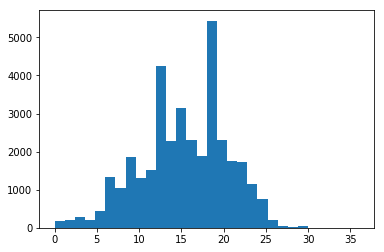

In [26]:
totalNumWords = [len(one_cleaned_tweet) for one_cleaned_tweet in X_train]
plt.hist(totalNumWords,bins=30)
plt.show()

In [27]:
X_train[7]

[1, 1151, 1011, 269, 151, 139, 1272, 1716, 1761]

In [28]:
max(totalNumWords)

36

In [29]:
from keras.preprocessing import sequence
max_words = max(totalNumWords)
X_train = sequence.pad_sequences(X_train , maxlen = max_words)
X_test = sequence.pad_sequences(X_test , maxlen = max_words)
print(X_train.shape,X_test.shape)

(35601, 36) (15258, 36)


In [30]:
X_train[7]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    1, 1151, 1011,  269,  151,  139,
       1272, 1716, 1761], dtype=int32)

# LSTM

### Importing Libraries

In [31]:
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [32]:
batch_size = 128
epochs = 2

In [33]:
def get_model(max_features , embed_dim):
    np.random.seed(seed)
    K.clear_session()
    model = Sequential()
    model.add(Embedding(max_features , embed_dim , input_length=X_train.shape[1]))
    model.add(LSTM(100 , dropout=0.2 , recurrent_dropout=0.2))
    model.add(Dense(num_classes , activation='softmax'))
    model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
    print(model.summary())
    return model
    

In [34]:
def model_train(model):
    #training the model
    model_history = model.fit(X_train , y_train , validation_data = (X_test , y_test), 
                              epochs = epochs ,batch_size= batch_size,verbose = 2)
    #plotting train history
    plot_model_history(model_history)


In [35]:
def plot_model_history(model_history):
    fig , axs = plt.subplots( 1 , 2 , figsize=(15,5))
    
    #Summarize history for accuracy
    
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    
    axs[0].set_title("Model Accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].set_xlabel("Epoch")
    
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    
    axs[0].legend(['train', 'val'], loc='best')
    
    #Summarize history for loss
    
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    
    axs[1].set_title("Model Loss")
    axs[1].set_ylabel("Loss")
    axs[1].set_xlabel("Epoch")
    
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    
    axs[1].legend(['train', 'val'], loc='best')
    
    plt.show()
    

In [36]:
def model_evaluate():
    #predict classes with test set
    y_pred_test = model.predict_classes(X_test , batch_size = batch_size, verbose =0)
    print("Predicted ", y_pred_test[:50])
    print("True " , np.argmax(y_test[:50],axis = 1))
    print('Accuracy:\t{:0.1f}%'.format(accuracy_score(np.argmax(y_test,axis = 1),y_pred_test)*100))
    
    #Classification Report
    print("\n")
    print(classification_report(np.argmax(y_test, axis =1),y_pred_test))
    
    #Confusion Matrix
    confmat = confusion_matrix(np.argmax(y_test , axis = 1), y_pred_test)
    fig , ax = plt.subplots(figsize=(4,4))
    ax.matshow(confmat , cmap =plt.cm.Blues , alpha = 0.3)
    
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text( x = j , y = i , s =confmat[i,j] , va = 'center' , ha = 'center')
    
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.tight_layout()

# Train the model

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 36, 100)           2000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 2,080,703
Trainable params: 2,080,703
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Train on 35601 samples, validate on 15258 samples
Epoch 1/2
 - 27s - loss: 0.3552 - acc: 0.8640 - val_loss: 0.1301 - val_acc: 0.9599
Epoch 2/2
 - 25s - loss

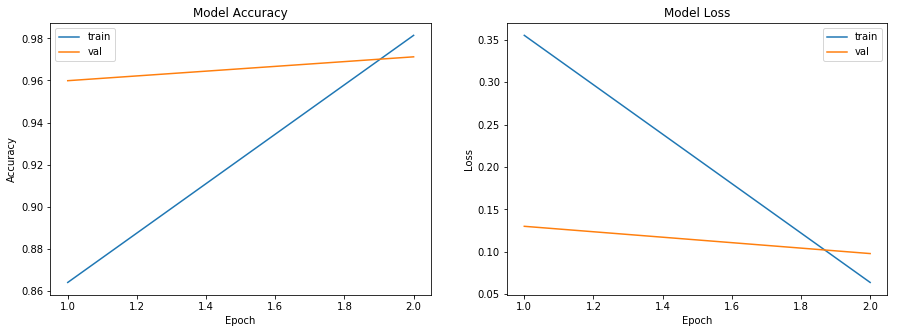

In [37]:
max_features = 20000
embed_dim =100
model = get_model(max_features,embed_dim)
model_train(model)

# Evaluate Model With Test Set¶

Predicted  [0 0 1 1 1 2 2 1 0 1 2 1 2 2 2 2 2 2 1 1 2 1 2 1 2 0 1 0 2 2 0 1 1 2 1 2 2
 1 1 2 1 1 0 0 2 1 2 2 1 2]
True  [0 0 1 1 1 2 2 1 0 1 2 1 2 2 2 2 2 2 1 1 2 1 2 1 2 0 1 0 2 2 0 1 1 2 1 2 2
 1 1 2 1 1 0 0 2 1 2 2 0 2]
Accuracy:	97.1%


              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1754
           1       0.97      0.98      0.97      6528
           2       0.98      0.98      0.98      6976

   micro avg       0.97      0.97      0.97     15258
   macro avg       0.97      0.96      0.96     15258
weighted avg       0.97      0.97      0.97     15258



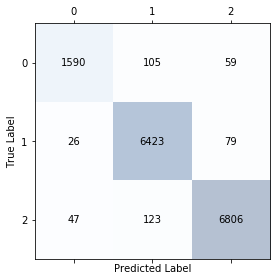

In [38]:
model_evaluate()